# ROBOCAFE LA: MARKET ANALYSIS FOR A ROBOT-RUN CAFE IN LOS ANGELES

# Introduction 

- Emerging Trends: Evaluate the latest trends in the Los Angeles restaurant industry, focusing on technology integration and customer reception to automation in dining.
- Investment Appeal: Analyze the long-term viability and profitability of robot-run cafes by assessing potential competition and market saturation post-novelty phase.
- Data-Driven Decisions: Utilize open-source data to provide a comprehensive market analysis, identifying key growth areas and potential challenges for a robot-run cafe in Los Angeles.

> rest_data table:
> - object_name — establishment name
> - chain — chain establishment (TRUE/FALSE)
> - object_type — establishment type
> - address — address
> - number — number of seats

## Goals:

- Analyze the competitive landscape and customer preferences for automated dining in Los Angeles to validate market potential.
- Determine the most effective operational structure and technological integration to maximize efficiency and customer satisfaction.
- Create a scalable business model with clear financial and marketing strategies to attract investments for initial launch and future growth.

 # Table of Contents  
1. [Stage 1: Data Preprocessing](#1)
    1. ['rest_data' file](#2)
1. [Stage 2: Exploratory Data Analysis](#3) 
    1. [Proportions of the various types of establishments](#4)
    1. [Proportions of chain and nonchain establishments](#5)
    1. [Which type of establishment is typically a chain?](#6)
    1. [What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#7)
    1. [Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats?](#8)
    1. [Put the data on street names from the address column in a separate column.](#9)
    1. [Plot a graph of the top ten streets by number of restaurants](#10)
    1. [Find the number of streets that only have one restaurant](#11)
    1. [For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can be seen?](#12)
1. [Stage 3: Overall Conclusion](#13)
1. [Stage 4: Presentation Slide](#14)

<a id="1"></a> 
# Stage 1 : Data Preprocessing

In [1]:
from scipy import stats as st #for probability and calculation of statistics
import pandas as pd #for dataframe manipulation
import numpy as np #for advanced mathematic operation
import matplotlib.pyplot as plt #for plotting and visualize graph
import seaborn as sns
import nltk #for string/text manipulation

<a id="2"></a> 
## 'Rest_data' file

In [2]:
# Loading note from the remote Jupyter Hub Notebook (rest_df)
try:
    rest_df = pd.read_csv('/datasets/rest_data_us.csv')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        rest_df = pd.read_csv('/datasets/rest_data_us.csv')
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")

In [3]:
rest_df.info()
rest_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [4]:
# Check missing values in 'rest_df'
rest_missing_values = rest_df.isna().sum()
rest_missing_values

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [5]:
rest_df[rest_df['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [6]:
total_rows = 9651
null_val = (rest_df['chain'].isna().sum() / total_rows)*100
null_val

0.031084861672365557

In [7]:
# Check duplicated values in 'rest_df'
rest_duplicates = rest_df['id'].duplicated().sum()
rest_duplicates

0

In [8]:
# Drop rows containing NaN in the 'chain' column
rest_df = rest_df.dropna(subset=['chain'])

# Verify the changes
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


- Based on above analysis, there are three missing values for three rows at 'chain'
- Percentage of Missing Values: The percentage of missing values in the 'chain' column is calculated as (3 / 9,651) * 100, which results in 0.031%.
- Based on the analysis, it can be concluded that the 'chain' column has a very low percentage of missing values (0.031%), which indicates that information on whether a restaurant is part of a chain is available for the vast majority of entries.
- Therefore, since this missing values has no meaningful to this analysis, the data will be drop.

<a id="3"></a> 
# Stage 2: Exploratory Data Analysis

- Below are the questions that need to be answered throughout this analysis:

> 1. Investigate the proportions of the various types of establishments. Plot a graph.
> 2. Investigate the proportions of chain and nonchain establishments. Plot a graph.
> 3. Which type of establishment is typically a chain?
> 4. What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
> 5. Put the data on street names from the address column in a separate column.
> 6. Plot a graph of the top ten streets by number of restaurants.
> 7. Find the number of streets that only have one restaurant.
> 8. For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can be seen?
> 9. Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain. 
> 10. Provide overall presentation

<a id="4"></a> 
### Proportions of the various types of establishments

- To analyze the distribution of different types of establishments in the DataFrame, the value_counts() method can be applied to the 'object_type' column. 
- This approach will provide the frequency of each unique type of establishment. To determine their proportions, we can divide these counts by the total number of entries in the DataFrame.

In [9]:
establishment_counts = rest_df['object_type'].value_counts()
total_establishments = len(rest_df)

# Calculate the proportions
establishment_proportions = establishment_counts / total_establishments

# Print the proportions
print(establishment_proportions)

Restaurant    0.751762
Fast Food     0.110489
Cafe          0.045087
Pizza         0.033064
Bar           0.030265
Bakery        0.029333
Name: object_type, dtype: float64


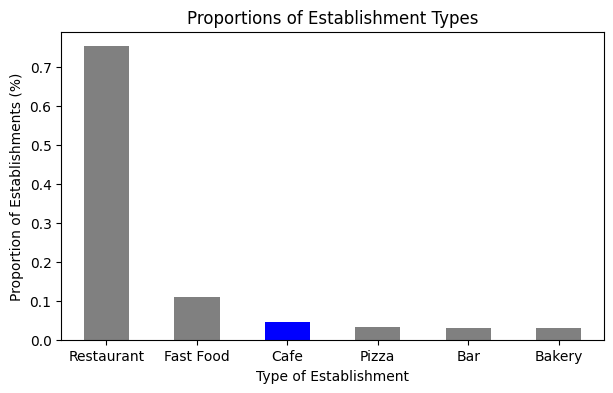

In [10]:
establishment_counts = rest_df['object_type'].value_counts(normalize=True)

color = ["blue" if r_type == "Cafe" else "grey" for r_type in establishment_counts.index]

plt.figure(figsize=[7, 4])
establishment_counts.plot(kind='bar', color=color)
plt.title('Proportions of Establishment Types')
plt.xlabel('Type of Establishment')
plt.ylabel('Proportion of Establishments (%)')
plt.xticks(rotation=0)
plt.show()

> - Restaurants dominate: The graph clearly shows that restaurants make up the majority of establishments, with their proportion significantly higher than any other type. This suggests that sit-down dining experiences are the most common in this market.

> - Fast Food and Cafes: Fast food establishments are the next most common, but with a much smaller proportion compared to restaurants, indicating a substantial preference for more formal dining options over quick-service options. Cafes have an even smaller share, which may indicate a niche market or less demand compared to other dining experiences.

> - Minority Establishments: Pizza places, bars, and bakeries hold minor positions in the proportions, suggesting these are less prevalent. This could imply either a lower consumer demand or higher competition in these categories, or possibly both.

> - Market Segmentation Opportunity: The overwhelming dominance of restaurants might suggest a saturated market, whereas the relatively lower proportions of cafes, bars, bakeries, and pizza places might offer opportunities for new businesses, especially if they can differentiate themselves or tap into unmet consumer needs.

> - Strategic Considerations: For a new entrant like a robot-run cafe, this data suggests focusing on unique offerings that distinguish it from traditional restaurants and fast-food outlets, potentially fitting into the cafe category but with a unique twist.

<a id="5"></a> 
### Proportions of chain and nonchain establishments

- To examine the distribution of chain versus non-chain establishments in the DataFrame, the value_counts() method on the 'chain' column cna be utilized. 
- This will provide the counts for each category, specifically True and False. To determine their respective proportions, these counts can be divided by the overall number of establishments in the dataset.

In [11]:
chain_counts = rest_df['chain'].value_counts()
total_establishments = len(rest_df)

# Calculate the proportions
chain_proportions = chain_counts / total_establishments

# Print the proportions
print(chain_proportions)

False    0.618988
True     0.381012
Name: chain, dtype: float64


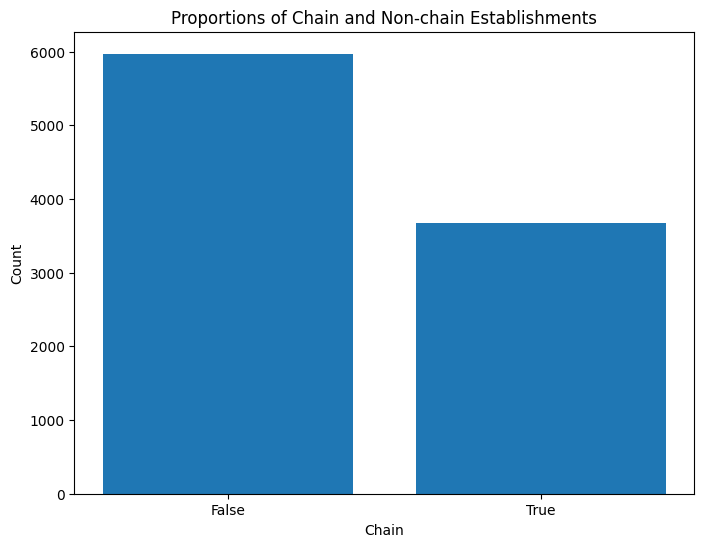

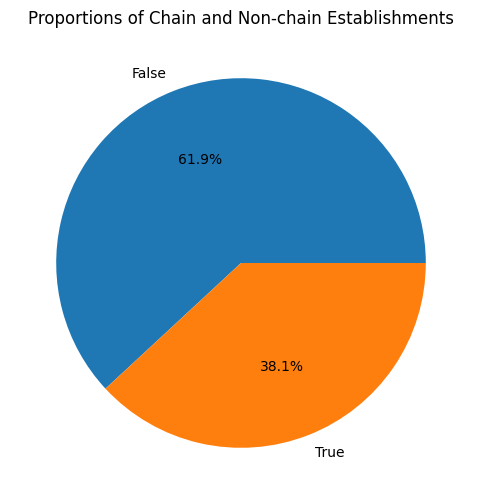

In [12]:
chain_counts = rest_df['chain'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(chain_counts.index.astype(str), chain_counts)
plt.xlabel('Chain')
plt.ylabel('Count')
plt.title('Proportions of Chain and Non-chain Establishments')

plt.show()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(chain_counts, labels=chain_counts.index, autopct='%1.1f%%')
plt.title('Proportions of Chain and Non-chain Establishments')

plt.show()

> - Independent establishments are more common: The data shows that about 61.9% (0.618796) of the establishments are non-chain, indicating that a majority of the establishments in the dataset operate independently rather than as part of a chain.

> - Chain establishments are also notable: Chain establishments constitute approximately 38.1% (0.380893) of the dataset. While they are less prevalent than non-chain establishments, they still form a substantial segment of the market.

<a id="6"></a> 
### Which type of establishment is typically a chain?

- To identify which type of establishment commonly operates as part of a chain in the provided DataFrame, the association between the 'chain' column and the 'object_type' column can be investigated. 
- By calculating the percentage of chain establishments within each type of establishment, we can determine which category has the highest proportion of chain operations.

In [13]:
chain_establishments = rest_df[rest_df['chain'] == True]
chain_proportions_by_type = chain_establishments['object_type'].value_counts(normalize=True)
chain_proportions_by_type

Restaurant    0.623504
Fast Food     0.164581
Bakery        0.076986
Cafe          0.072361
Pizza         0.041621
Bar           0.020947
Name: object_type, dtype: float64

In [14]:
# Find the type with the highest proportion of chain establishments
most_common_chain_type = chain_proportions_by_type.idxmax()

# Print the most common chain establishment type
print("The type of establishment typically a chain: ", most_common_chain_type)

The type of establishment typically a chain:  Restaurant


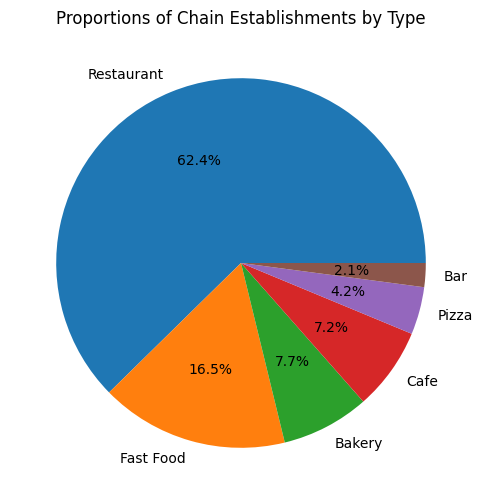

In [15]:
labels = chain_proportions_by_type.index
proportions = chain_proportions_by_type.values

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', normalize=False)
plt.title('Proportions of Chain Establishments by Type')

# Display the chart
plt.show()

> - Dominance of Restaurants: Restaurants represent a significant majority of the chain establishments at 62.4%. This suggests that restaurants are the most common type of establishment to be part of a chain, likely due to scalable business models that are easy to replicate across multiple locations.

> - Fast Food Presence: Fast food establishments account for 16.5% of chain establishments, highlighting their role as a significant segment within chain operations. The nature of fast food—standardized menus, quick service, and lower operational costs—makes it well-suited to chain models.

> - Other Establishments: Cafes, bakeries, bars, and pizza places make up smaller portions of the chain establishments. Cafes and bakeries each constitute about 7.7% and 7.2% respectively, which indicates a moderate presence in the chain segment. Bars and pizza places are even less common in chain forms, with only 4.2% and 2.1% respectively.

<a id="7"></a> 
### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

- To understand the seating capacity trends among chain establishments in the provided DataFrame, the correlation between the 'chain' column and the 'number' column can be examined. 
- By comparing the average number of seats for both chain and non-chain establishments, we can discern whether chains typically consist of many locations with fewer seats or fewer locations with more seats.

In [16]:
chain_establishments = rest_df[rest_df['chain'] == True]
non_chain_establishments = rest_df[rest_df['chain'] == False]

# Calculate the average number of seats for chain and non-chain establishments
avg_seats_chain = chain_establishments['number'].mean()
avg_seats_non_chain = non_chain_establishments['number'].mean()

print("The average number of seats for chain establishments: ", avg_seats_chain)
print("The average number of seats for non-chain establishments: ", avg_seats_non_chain)

The average number of seats for chain establishments:  39.69423286180631
The average number of seats for non-chain establishments:  46.17146684527796


In [17]:
# Determine the seating pattern characterization
if avg_seats_chain < avg_seats_non_chain:
    characterization = "Chains are characterized by many establishments with a small number of seats."
else:
    characterization = "Chains are characterized by a few establishments with a lot of seats."

# Print the seating pattern characterization
print("Characterization of Chains: ", characterization)

Characterization of Chains:  Chains are characterized by many establishments with a small number of seats.


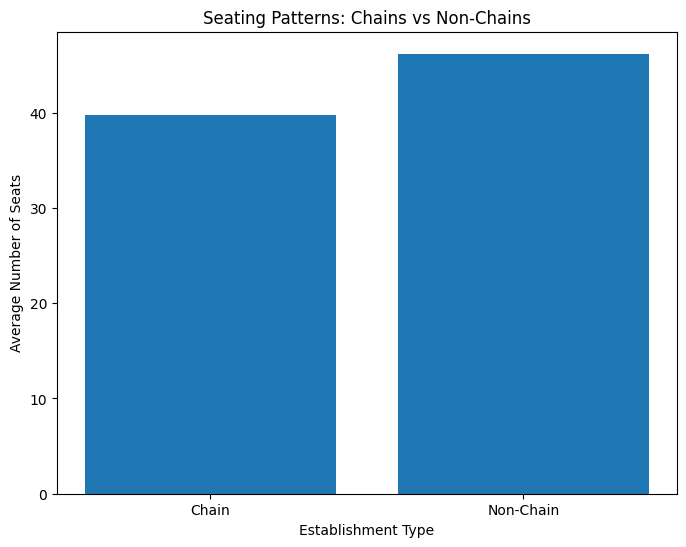

In [18]:
# Create the grouped bar chart
categories = ['Chain', 'Non-Chain']
average_seats = [avg_seats_chain, avg_seats_non_chain]

plt.figure(figsize=(8, 6))
plt.bar(categories, average_seats)
plt.xlabel('Establishment Type')
plt.ylabel('Average Number of Seats')
plt.title('Seating Patterns: Chains vs Non-Chains')

# Display the chart
plt.show()

> - Comparable Seating Capacity: The graph shows that the average number of seats for chain establishments is slightly lower than for non-chain establishments, but the difference is not substantial. This suggests that both chain and non-chain establishments tend to have similar seating capacities.

> - Implications for Chains: The data indicates that chain establishments do not necessarily focus on smaller seating arrangements, which might be expected if they were primarily fast food or quick-service restaurants. Instead, chains appear to have a seating capacity that allows for a variety of restaurant types, possibly including sit-down dining.

> - Non-Chain Flexibility: Non-chain establishments having a marginally higher average number of seats could reflect greater variability in their business models. Non-chains might include larger dining venues or restaurants that offer a more expansive seating arrangement, which could be less common in standardized chain models.

<a id="8"></a> 
### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats?

- To calculate the average number of seats for each type of establishment and identify which type has the highest average, the DataFrame can be grouped by the 'object_type' column and compute the mean of the 'number' column for each group.

In [19]:
average_seats_by_type = rest_df.groupby('object_type')['number'].mean()
average_seats_by_type

object_type
Bakery        21.773852
Bar           44.767123
Cafe          25.000000
Fast Food     31.837711
Pizza         28.545455
Restaurant    48.048807
Name: number, dtype: float64

In [20]:
# Find the type of restaurant with the greatest average number of seats
restaurant_with_most_seats = average_seats_by_type.idxmax()

print("Type of restaurant with the greatest average number of seats is", restaurant_with_most_seats)

Type of restaurant with the greatest average number of seats is Restaurant


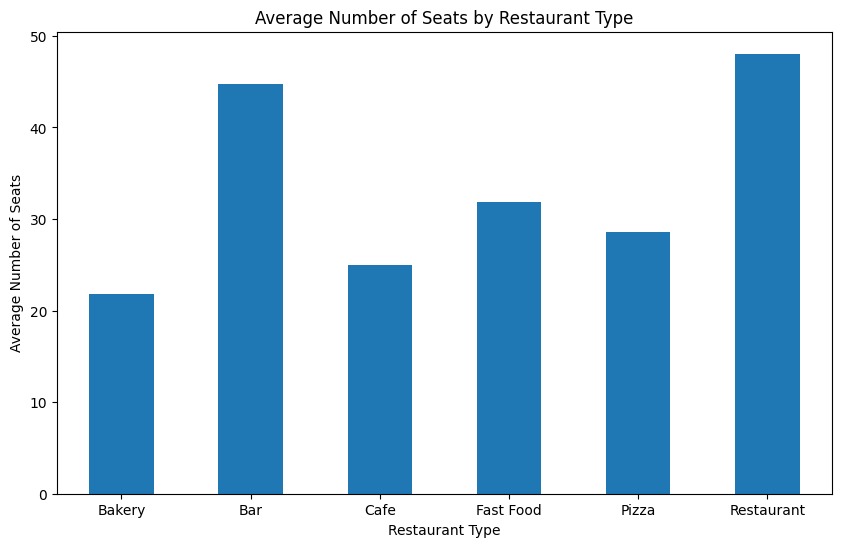

In [21]:
# Create the bar chart
plt.figure(figsize=(10, 6))
average_seats_by_type.plot(kind='bar')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Number of Seats')
plt.title('Average Number of Seats by Restaurant Type')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=0)

# Display the chart
plt.show()

> - Variation in Seating Capacity: The average number of seats differs significantly across different types of establishments.

> - Highest Capacity: Restaurants have the greatest average number of seats (48 seats), indicating their capacity to accommodate more patrons.

> - Notable Capacities: Both bars (45 seats) and fast food (32 seats) establishments also exhibit relatively high average seating capacities.

> - Smaller Venues: Cafes (25 seats), bakeries (22 seats), and pizza (29 seats) places typically have lower seating capacities, reflecting smaller venue sizes compared to other establishment types.

<a id="9"></a> 
### Put the data on street names from the address column in a separate column.

In [22]:
rest_df.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [23]:
import re
rest_df['street_name'] = rest_df['address'].replace('\d+\s','',regex=True)

# Print the updated DataFrame
display(rest_df)

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


In [24]:
rest_df['street_name'].isna().sum() # check missing values

0

In [25]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
 6   street_name  9648 non-null   object
dtypes: int64(2), object(5)
memory usage: 603.0+ KB


<a id="10"></a> 
### Plot a graph of the top ten streets by number of restaurants

- Filter object_type by Restaurant and sort it by street_name.

In [26]:
top_ten_streets = rest_df[rest_df['object_type'] == 'Restaurant']['street_name'].value_counts().head(10)

# Print the top ten streets
display(top_ten_streets)

W PICO BLVD          218
W SUNSET BLVD        217
HOLLYWOOD BLVD       136
WILSHIRE BLVD        131
W 3RD ST             119
S VERMONT AVE        107
W OLYMPIC BLVD       107
SANTA MONICA BLVD    107
MELROSE AVE          106
BEVERLY BLVD         103
Name: street_name, dtype: int64

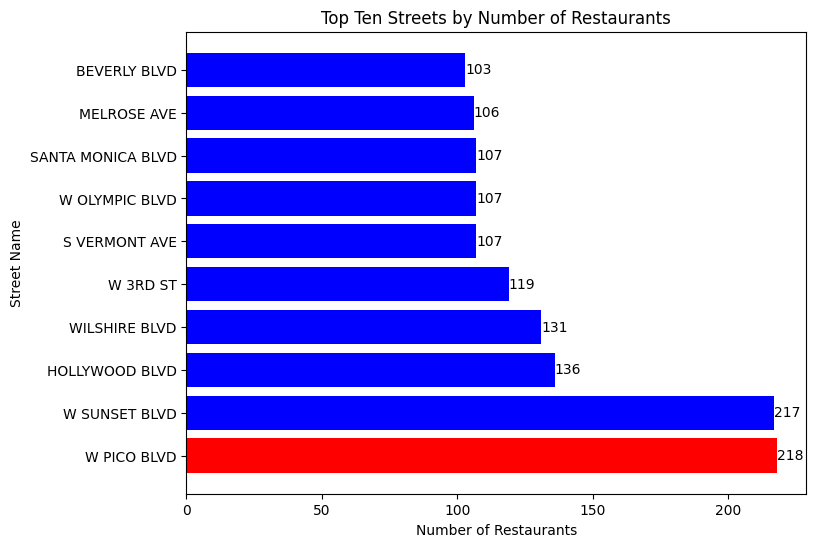

In [33]:
streets = top_ten_streets.index
restaurant_count = top_ten_streets.values

colors = ['blue' if count != max(restaurant_count) else 'red' for count in restaurant_count]

# Plotting the horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(streets, restaurant_count, color=colors)

# Adding value annotations to the bars
for i, count in enumerate(restaurant_count):
    plt.text(count, i, str(count), ha='left', va='center')

# Labeling the axes and setting the title
plt.xlabel('Number of Restaurants')
plt.ylabel('Street Name')
plt.title('Top Ten Streets by Number of Restaurants')

# Displaying the plot
plt.show()

> - High Concentration on Pico Blvd: Pico Blvd stands out with the highest number of restaurants at 218, indicating a major dining hub.
> -Sunset Blvd's Prominence: Following closely is Sunset Blvd with 217 restaurants, nearly matching Pico Blvd's count.
> - Significant Gap: There is a noticeable drop in restaurant numbers when moving from Hollywood Blvd (136 restaurants) to Wilshire Blvd (131 restaurants).
> - Cluster of Mid-Range Streets: Streets like Beverly Blvd, Melrose Ave, and Vermont Ave host around 100-107 restaurants each, showing a moderate concentration.

<a id="11"></a> 
### Find the number of streets that only have one restaurant

In [34]:
street_counts = rest_df[rest_df['object_type'] == 'Restaurant']['street_name'].value_counts()
streets_with_one_restaurant = street_counts[street_counts == 1]
streets_with_one_restaurant

S GRAND AVE STE D-3                  1
W BARRINGTON CT                      1
SA VICENTE BLVD STE 100              1
N FARING RD                          1
CENTURY PARK E STE #330              1
                                    ..
UCLA MEDICAL PLZ #170                1
ASTRONAUT ELLISON ONIZUKA ST #301    1
EXPOSITION PARK DR                   1
S WESTERN AVE E                      1
S MARLTON AVE                        1
Name: street_name, Length: 1974, dtype: int64

In [35]:
# Count the number of streets with only one restaurant
num_streets_with_one_restaurant = len(streets_with_one_restaurant)

# Print the result
print("Number of streets with only one restaurant:", num_streets_with_one_restaurant)

Number of streets with only one restaurant: 1974


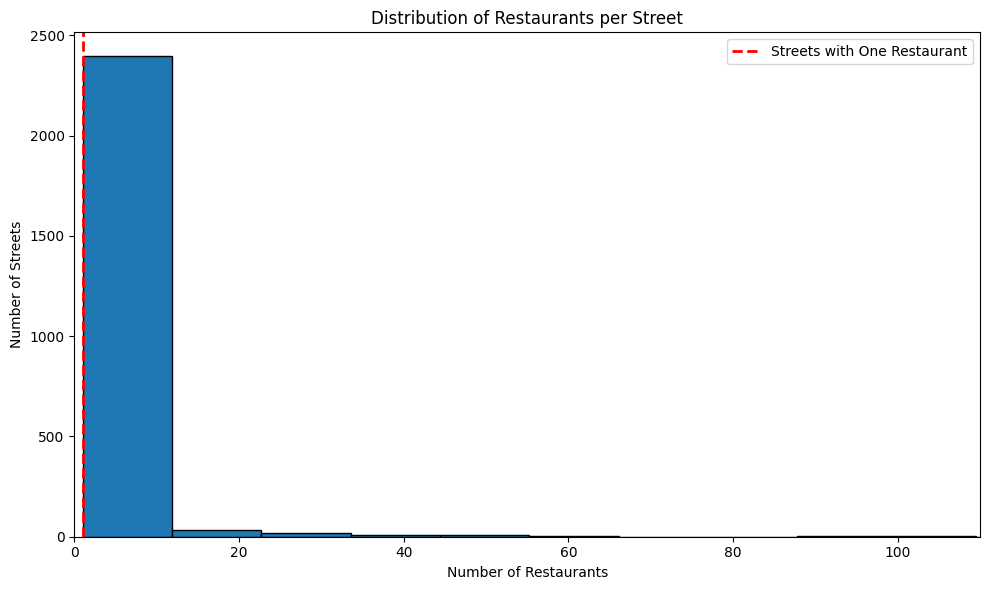

In [36]:
# Get the count of restaurants per street
restaurant_counts = rest_df[rest_df['object_type'] == 'Restaurant']['street_name'].value_counts()

# Filter streets with only one restaurant
streets_with_one_restaurant = restaurant_counts[restaurant_counts == 1]

# Get the count of streets with only one restaurant
num_streets_with_one_restaurant = len(streets_with_one_restaurant)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(restaurant_counts, bins=20, edgecolor='black')

plt.xlabel('Number of Restaurants')
plt.ylabel('Number of Streets')
plt.title('Distribution of Restaurants per Street')

# Add a vertical line to indicate streets with only one restaurant
plt.axvline(x=1, color='red', linestyle='dashed', linewidth=2, label='Streets with One Restaurant')

# Set x-axis limit to 110
plt.xlim(0, 110)

plt.legend()
plt.tight_layout()
plt.show()

> - A total of 1,995 streets in the dataset feature only one restaurant each.
> - The distribution of restaurants across streets predominantly shows that most streets have a few restaurants.
> - According to the histogram, the most frequent occurrence is streets with just one restaurant, making it the highest frequency bin.
> - The high number of streets with only one restaurant points to a widespread, rather than concentrated, distribution of restaurants throughout various streets.
> - Streets hosting a single restaurant may be seen as unique dining spots or located in less commercially dense areas.
> - The histogram includes a red dashed line that marks the significant number of streets with only one restaurant, distinguishing them from those with multiple dining establishments.

<a id="12"></a> 
### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can be seen?

- To explore the seating capacity trends on streets that have a high number of restaurants, we can concentrate on these densely populated streets and analyze how the number of seats varies among them.

In [37]:
restaurant_streets = rest_df[rest_df['object_type'] == 'Restaurant']['street_name']

# Select streets with a high frequency of restaurants
high_freq_streets = restaurant_streets.value_counts().head(3).index

# Filter the data for the selected streets
selected_data = rest_df[rest_df['street_name'].isin(high_freq_streets)]

In [38]:
selected_data_sorted = selected_data.sort_values(by='number', ascending=False)

In [39]:
selected_data_sorted.head()

,id,object_name,address,chain,object_type,number,street_name
5091,16877,BOULEVARD 3,6523 W SUNSET BLVD,False,Restaurant,229,W SUNSET BLVD
4626,16412,PLAYHOUSE,6506 HOLLYWOOD BLVD,False,Restaurant,229,HOLLYWOOD BLVD
8892,20678,LOWBOY,1536 W SUNSET BLVD,False,Restaurant,228,W SUNSET BLVD
2810,14596,BANQUET KITCHEN (2ND FLOOR),6250 HOLLYWOOD BLVD,False,Restaurant,222,HOLLYWOOD BLVD
4020,15806,AROMA BAKERY CAFE,7373 W SUNSET BLVD,True,Bakery,218,W SUNSET BLVD


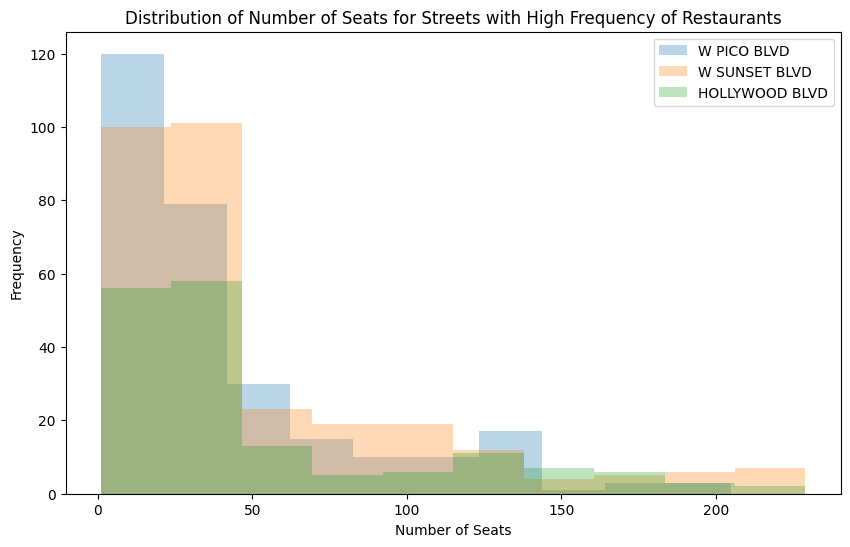

In [40]:
# Plot the distribution of the number of seats for each street
plt.figure(figsize=(10, 6))
for street in high_freq_streets:
    street_data = selected_data[selected_data['street_name'] == street]
    plt.hist(street_data['number'], bins=10, alpha=0.3, label=street)

plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Number of Seats for Streets with High Frequency of Restaurants')
plt.show()

> - Sunset Blvd (W Sunset Blvd) and Hollywood Blvd stand out with a high concentration of restaurants, leading the list with the highest number of establishments. Notably, Boulevard 3 on W Sunset Blvd and Playhouse on Hollywood Blvd each boast 229 seats, highlighting their popularity.

> - A diverse mix of both chain and non-chain establishments populates these prominent streets. Notably, Boulevard 3 and Playhouse are independent operations, demonstrating that non-franchise restaurants can also succeed in high-traffic areas.

> - The variety among the top dining spots on these streets extends to different types of food service operations, including traditional restaurants, bakeries, and even specialized banquet facilities, reflecting a rich and varied dining environment.

> - The locations of these restaurants on busy, well-known streets suggest they benefit from heavy foot traffic and high visibility, making them attractive spots for launching a food business.

- Collectively, these trends underscore that Sunset Blvd and Hollywood Blvd are dynamic culinary hubs, appealing to a broad audience with their eclectic food offerings and supporting both chain and independent ventures. These streets are evidently favored by both locals and tourists for their extensive dining choices.

<a id="13"></a> 
# Stage 3: General conclusion 

- Conclusion:
> - Sunset Blvd and Hollywood Blvd present optimal locations for launching a new restaurant due to their high visibility and established popularity. The mix of chain and non-chain establishments, along with a range of culinary offerings, highlights a market receptive to both innovation and traditional dining experiences.

- Recommendations:

> - Number of Seats: Start with a moderate number of seats (50-70) to maintain an intimate setting while accommodating enough patrons to ensure profitability. This size would facilitate efficient service by your robotic staff without overwhelming the technology, ensuring a high-quality customer experience.

> - Chain Development: Given the success of both chain and non-chain establishments on these streets, starting a cafe that could eventually evolve into a chain might be a strategic move. Focus on creating a scalable business model right from the start, with standardized processes that can be easily replicated in new locations, possibly near other tech hubs or areas with high interest in sustainability and technology.

- This approach not only leverages the current market dynamics but also aligns with broader trends towards technological integration in dining, offering a fresh take that could captivate both local patrons and visitors.

<a id="14"></a> 
# Stage 4: Presentation Slide

- Presentation: https://drive.google.com/file/d/161VZQ83EOOlD44auu8A6--ezshjUQHVT/view?usp=drive_link